In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [83]:
df_users_data = pd.read_csv('../../users.tsv', sep='\t')
df_users_data.head(10)

,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4
5,5,2,22,5
6,6,1,21,6
7,7,2,18,0
8,8,2,28,3
9,9,1,15,7


In [84]:
median_users = df_users_data.loc[df_users_data['age'] != 0, 'age'].median()
print(median_users)
df_users_data['age'] = df_users_data['age'].replace(0, median_users)

28.0


## Провёл замену по столбцу 'age'

In [85]:
age_0_ratio = (df_users_data['age'] == 0).sum() / len(df_users_data)
print(age_0_ratio)

0.0


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'city_id'}>]], dtype=object)

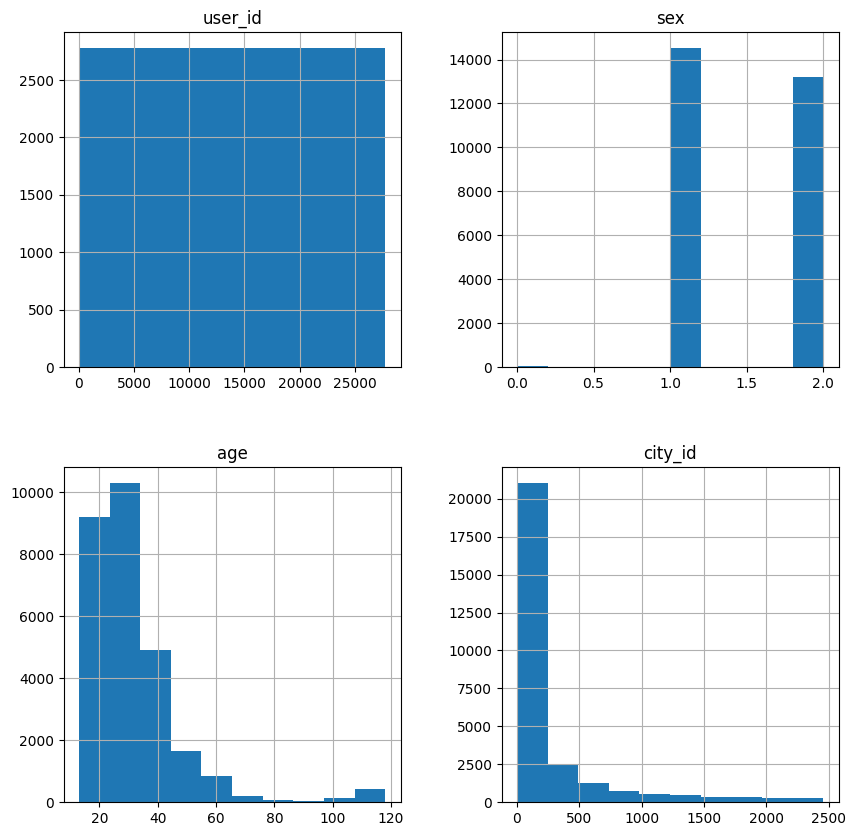

In [86]:
df_users_data.hist(figsize=(10, 10))

In [87]:
df_history_data = pd.read_csv('../../history.tsv', sep='\t')
df_history_data.head(10)

,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148
5,5,70.00,2,16334
6,10,73.22,1,25931
7,6,60.00,1,26199
8,21,125.46,1,9603
9,22,165.00,2,4624


   user_id  sex  age  city_id  hour      cpm  publisher
0        0    2   19        0  1186   805.65          1
1        0    2   19        0  1217  3302.01          1
2        1    1   28        1     8   165.00          1
3        1    1   28        1     9    53.20          1
4        1    1   28        1     9    36.00          1
5        1    1   28        1     9    51.00          1
6        1    1   28        1    34    30.00          1
7        1    1   28        1    34    90.00          1
8        1    1   28        1    57   222.00          1
9        1    1   28        1    68    45.00          1


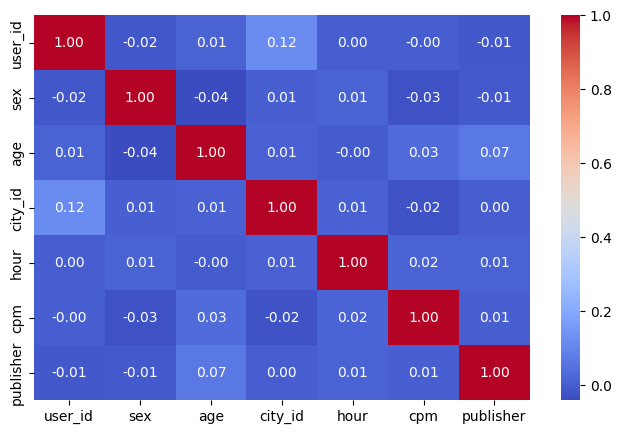

In [88]:
users_copy = df_users_data.copy()
history_copy = df_history_data.copy()

result = pd.merge(df_users_data, df_history_data, on='user_id', how='inner')
print(result.head(10))

plt.figure(figsize=(8, 5))
sns.heatmap(result.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [89]:
df_validate_data = pd.read_csv('../../validate.tsv', sep='\t')
df_validate_data['time_segment'] = df_validate_data['hour_end'] - df_validate_data['hour_start'] + 1
print(f'MIN: {df_validate_data['time_segment'].min()} ', f'MAX: {df_validate_data['time_segment'].max()}')
df_validate_data.head(10) # добавить перцетиль мужчин + попробовать интерпретировать списки

MIN: 3  MAX: 504


,cpm,hour_start,hour_end,publishers,audience_size,user_ids,time_segment
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",96
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",7
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",21
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524...",83
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",239
5,141.0,1288,1322,"3,8,11,15",856,"111,217,235,247,292,340,398,540,541,546,581,61...",35
6,250.0,1198,1451,"1,3,7,10,13,18",336,"24,43,96,124,150,256,299,313,430,450,552,557,5...",254
7,280.0,1029,1070,"1,2,7",616,"32,133,139,193,270,299,334,354,424,437,452,537...",42
8,270.0,978,994,"2,11",484,"52,57,139,249,290,311,327,374,488,614,751,753,...",17
9,250.0,1440,1442,"2,3",972,"46,58,176,209,255,284,305,312,367,410,427,513,...",3


In [90]:
df_validate_data['publishers'] = df_validate_data['publishers'].apply(lambda x: x.split(','))

mlb = MultiLabelBinarizer()
publishers_ohe = mlb.fit_transform(df_validate_data['publishers'])
publishers_df = pd.DataFrame(publishers_ohe, columns=[f'publisher_{p}' for p in mlb.classes_])

df_validate_data = df_validate_data.drop(columns=['publishers']).join(publishers_df)

df_validate_data.head()

,cpm,hour_start,hour_end,audience_size,user_ids,time_segment,publisher_1,publisher_10,publisher_11,publisher_12,...,publisher_2,publisher_20,publisher_21,publisher_3,publisher_4,publisher_5,publisher_6,publisher_7,publisher_8,publisher_9
0,220.0,1058,1153,1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",96,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,312.0,1295,1301,1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",7,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,70.0,1229,1249,888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",21,1,0,0,0,...,1,0,1,1,0,0,0,0,0,1
3,240.0,1295,1377,440,"44,122,187,209,242,255,312,345,382,465,513,524...",83,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,262.0,752,990,1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",239,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [91]:
df_validate_data.shape

(1008, 27)

### Таргеты на эвале

In [93]:
df_validate_answers_data = pd.read_csv('../../validate_answers.tsv', sep='\t')
df_validate_answers_data.head(10)

,at_least_one,at_least_two,at_least_three
0,0.0430,0.0152,0.0073
1,0.0130,0.0000,0.0000
2,0.0878,0.0135,0.0000
3,0.2295,0.1295,0.0727
4,0.3963,0.2785,0.2270
5,0.0187,0.0035,0.0012
6,0.3839,0.2917,0.2202
7,0.3198,0.1396,0.0552
8,0.0062,0.0000,0.0000
9,0.0082,0.0000,0.0000


In [94]:
df_validate_answers_data.shape

(1008, 3)

## TASK LIST

1. Нормализуем данные и склеиваем всё в одну таблицу
2. Проанализировать выбросы и на новой таблице построить ```heatmap```
3. OHE по ```publishers``` и encoding времени (каким-нибудь, возможно с шагом 10)
4. Добавить фичу среднего по пользователям, процент мальчиков, средний возраст
5. Провести аналитику по городам
6. Города поделить на категории как там часто видят рекламу

1. Заменить лист юзеров на усреднённые признаки
2. Применить какую-нибудь модель к этим данным
3. Посмотреть минимальные веса и откинуть их